# Pyplot tutorial

## Intro to pyplot

`matplotlib.pyplot` 是一组使 matplotlib 工作地像 MATLAB 一样的函数。 每个 `pyplot` 函数对 figure 做出一些改变。 例如， 创建 figure， 在 figure 中创建 plotting 区域， 在 plotting 区域中绘制一些线， 用 labels 装饰 plot。

`matplotlib.pyplot` 在多个函数调用上保留不同的状态， 因此它会追踪当前 figure 和 plotting 区域， 并且 plotting 函数将会重定向当前 axes。

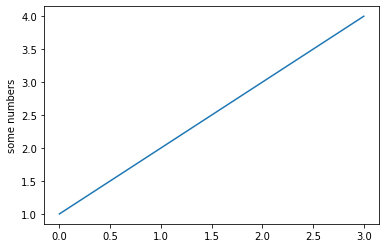

In [1]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

你可能会好奇为什么 x-axis 范围为 0-3 并且 y-axis 范围为 1-4。如果你给 `~.pyplot.plot` 提供一个数组或者列表， matplotlib 假设它是一个 y 值序列， 自动为你生成 x 值。 因为 python 索引从 0 开始， 默认的 x 向量长度和 y 相同， 索引从 0 开始， 因此 x 是 `[0, 1, 2, 3]`。

`~.pyplot.plot` 是一个 versatile 函数， 因此它接受任意数量的参数。

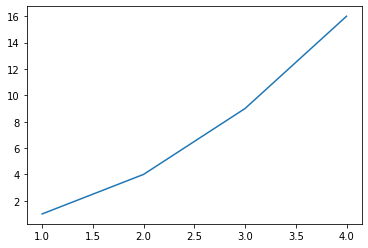

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

## Formatting the style of your plot

对于每对x，y对参数，都有一个可选的第三个参数, 其表示你绘制的线的类型和颜色。 格式化的 letters 和 symbols 来自 MATLAB。

默认格式字符串是'b-'，这是一条纯蓝线。例如， 你可以用红色的圆绘制上面的线

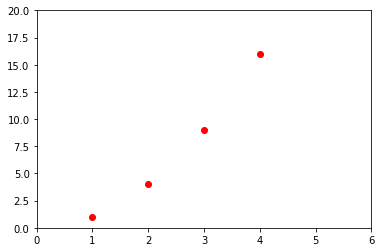

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
# 轴的范围
plt.axis([0, 6, 0, 20])
plt.show()

`~.pyploy.axis` 函数接受 `[xmin, xmax, ymin, ymax]` 并且 指定 axes 的 viewpoint。

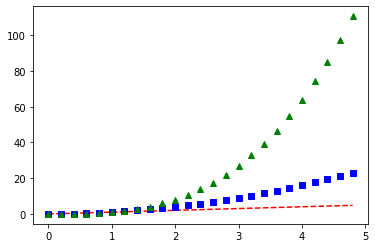

In [8]:
import numpy as np

t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Plotting with keyword strings

在某些情况下，您拥有一种格式的数据， 允许您使用字符串访问特定变量。例如 `numpy.recarray` 或者 `pandas.DataFrame`。

Matplotlib 允许你用 `data` 关键字参数提供这样的对象。 如果提供了， 那么你可以用和这些变量相关的字符串生成 plots.


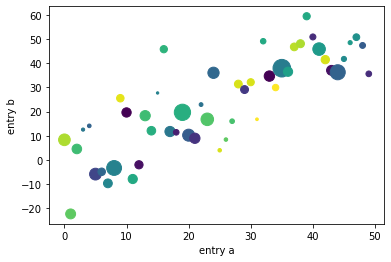

In [14]:
data = {
    'a' : np.arange(50),
    'c' : np.random.randint(0, 50, 50),
    'd' : np.random.randn(50)
}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
# plt.scatter('a', 'b', s='d', data=data)
# plt.scatter('a', 'b', c='c', data=data)
# plt.scatter('a', 'b', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## Plotting with categorical variables

也可以使用类别变量创建绘图。Matplotlib允许您将分类变量直接传递给很多绘图函数。 例如：

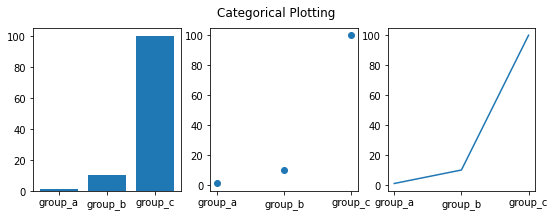

In [15]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Controlling line properties

线有很多可以设置的属性： linewidth, dash style, antialiased, etc; 见 `matplotlib.lines.Line2D`。 设置这些线的属性有几种方法：

使用关键字参数：

```
plt.plot(x, y, linewidth=2.0)
```

使用 `Line2D` 实例的setter方法。`plot` 返回 `Line2D` 对象。 例如， `line1, line2 = plot(x1, y1, x2, y2)`。 

使用 `~.pyplot.setp`。 下面的代码使用MATLAB 风格的函数设置一组线条的属性。 `setp` 透明地作用于一组对象或单个对象。

```
lines = plt.plot(x1, y1, x2, y2)
# 使用关键字参数
plt.setp(lines, color='r', linewidth=2.0)
# 使用 MATLAB 风格字符串值对
plt.step(lines, 'color', 'r', 'linewidth', 2.0)
```

下面是 `~.lines.Line2D` 的可用属性：

```
# ======================  ==================================================
# Property                Value Type
# ======================  ==================================================
# alpha                   float
# animated                [True | False]
# antialiased or aa       [True | False]
# clip_box                a matplotlib.transform.Bbox instance
# clip_on                 [True | False]
# clip_path               a Path instance and a Transform instance, a Patch
# color or c              any matplotlib color
# contains                the hit testing function
# dash_capstyle           [``'butt'`` | ``'round'`` | ``'projecting'``]
# dash_joinstyle          [``'miter'`` | ``'round'`` | ``'bevel'``]
# dashes                  sequence of on/off ink in points
# data                    (np.array xdata, np.array ydata)
# figure                  a matplotlib.figure.Figure instance
# label                   any string
# linestyle or ls         [ ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'steps'`` | ...]
# linewidth or lw         float value in points
# marker                  [ ``'+'`` | ``','`` | ``'.'`` | ``'1'`` | ``'2'`` | ``'3'`` | ``'4'`` ]
# markeredgecolor or mec  any matplotlib color
# markeredgewidth or mew  float value in points
# markerfacecolor or mfc  any matplotlib color
# markersize or ms        float
# markevery               [ None | integer | (startind, stride) ]
# picker                  used in interactive line selection
# pickradius              the line pick selection radius
# solid_capstyle          [``'butt'`` | ``'round'`` | ``'projecting'``]
# solid_joinstyle         [``'miter'`` | ``'round'`` | ``'bevel'``]
# transform               a matplotlib.transforms.Transform instance
# visible                 [True | False]
# xdata                   np.array
# ydata                   np.array
# zorder                  any number
```

为了得到一组可设置的线条的属性， 调用 `~.pyploy.setp` 函数， 将线条或者一组线条作为参数。

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor 

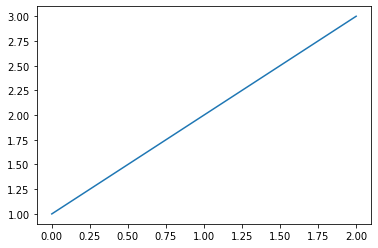

In [19]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

## Working with multiple figures and axes

MATLAB 和 `.pyplot` 有当前 figure 和 当前 axes 的概念。 所有的绘图函数应用于当前的 axes。 函数 `~.pyplot.gca` 返回当前的 axes, `~.pyplot.gcf` 返回当前的 figure。 通常情况下，您不必担心这个，因为这一切都是在幕后处理的。 下面是一个创建两个 subplts 的脚本。

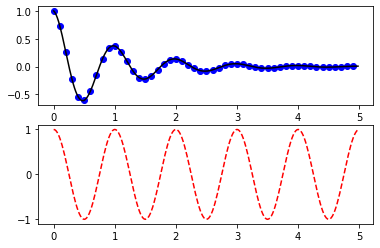

In [20]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

`~.pyplot.figure` 调用是可选的， 引入过 figure 不存在， 那么会创建一个 figure。 

`~.pyplot.subplot` 调用指定 `numrows, numcols, plot_number` 其中， `plot_number` 的范围从 1 到 `numrows * numcols`。 `subplot` 中的逗号是可选的， 如果 `numrows * numcols < 10`。 因此 `subplot(211)` 等价于 `subplot(2, 1, 1)`。

你可以创建任意数量的 subplots 和 axes。 如果你想要手动放置一个 Axes， 例如不是一个矩形的网格， 使用 `~.pyplot.axes`, 其允许你指定位置 `axes([left, bottom, width, height]` 其值在 (0, 1) 之间。 

你可以调用多个 `~.pyploy.figure` 创建多个 figures。 当然， 每个 figure 最多可以包含你想要的 axes 和 subplots 数量。

```
import matplotlib.pyplot as plt
plt.figure(1)                  # the first figure
plt.subplot(211)               # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)               # the second subplot in the first figure
plt.plot([4, 5, 6])

plt.figure(2)                  # a second figure
plt.plot([4, 5, 6])            # creates a subplot() by default

plt.figure(1)                  # figure 1 current; subplot(212) still current
plt.subplot(211)               # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3')   # subplot 211 title
```

你可以使用 `~.pyplot.clf` 和 `~.pyplot.cla` 来清空当前的 figure 和 axes。

如果你想要绘制大量的 figures, 你需要注意一件事： 一个 figure 在 `~.pyplot.close` 之前内存不会释放。  

## Working with text

`~.pyplot.text` 可以用来在任意位置上添加文本， `~.pyplot.xlabel`， `~.pyplot.ylabel` 和 `~.pyplot.title` 可以用来在指定位置添加文本

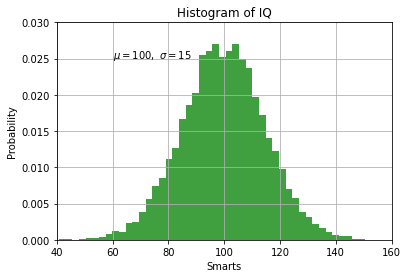

In [21]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

所有的 `~.pyplot.text` 函数返回一个 `matplotlib.text.Text` 实例。 就像上面的线条一样， 你可以传入关键字参数到 text 函数实现定制化属性， 或者使用 `~.pyplot.step`。

```
t = plt.xlabel('my data', fontsize=14, color='red')
```

## Using mathematical expressions in text

matplotlib 在所有文本表示中接受 TeX 表示。 例如， 在标题中写下 `\sigma_i=15`， 你可以将 Tex 表达式写在 dollar 符号之中。

```
plt.title(r'$\sigma_i=15$')
```

## Annotating text

`~.pyplot.text` 函数将文本放在 Axes 的任一位置。 通常用文本标注 plot 的一些特征， `~.pyplot.annoate` 方法提供帮助函数使得标注更简单。 在标注中， 有两点要考虑的： 表示位置的参数 `xy`, 表示文本未知的参数 `xytext`。 两个都是 `(x, y)` tuples。

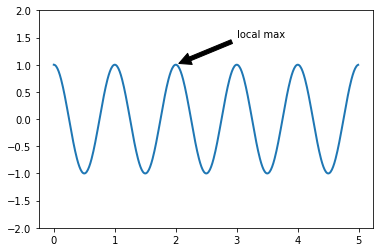

In [22]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.ylim(-2, 2)
plt.show()

## Logarithmic and other nonlinear axes

`matplotlib.pyplot` 不仅支持 linear axis scales, 而且还支持 logarithmic 和 logit scales。  如果数据 span 跨几个规模。 改变 axis 的 scale 是容易的：

```pythpn
plt.xscale('log')
```


In [23]:
np.random.seed(19680801)

In [24]:
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

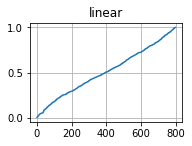

In [25]:
# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

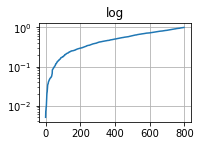

In [26]:
# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

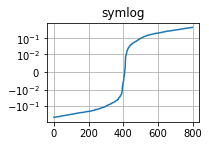

In [27]:
# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)


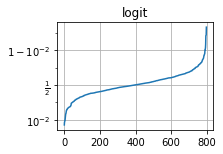

In [28]:
# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)